In [14]:
%pip install pandas
%pip install openpyxl
import pandas as pd
import io
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
nettit = pd.read_csv('netflix_titles.csv')
net = pd.read_excel('netflix.xlsx')


In [16]:
net.head()

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2023-03-29 12:00:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany)
1,2023-03-29 11:45:00,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany)
2,2023-03-29 10:40:00,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany)
3,2023-03-21 12:23:00,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany)
4,2023-03-21 12:22:00,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany)


In [114]:
import gender_guesser.detector as gender
d = gender.Detector()

def get_gender(name):
    first_name = str(name).split()[0]
    return d.get_gender(first_name)

nettit_directors = nettit[nettit['director'].notna()].copy()
nettit_directors['gender'] = nettit_directors['director'].apply(get_gender)

gender_mapping = {
    'female': 'female',
    'mostly_female': 'female',
    'andy': 'unknown',
    'unknown': 'unknown',
    'male': 'male',
    'mostly_male': 'male'
}

nettit_directors['gender'] = nettit_directors['gender'].replace(gender_mapping)
nettit_directors = nettit_directors[nettit_directors['gender']!= 'unknown']

In [18]:
old_movies = nettit[nettit['release_year'] == nettit['release_year'].min()]
old_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


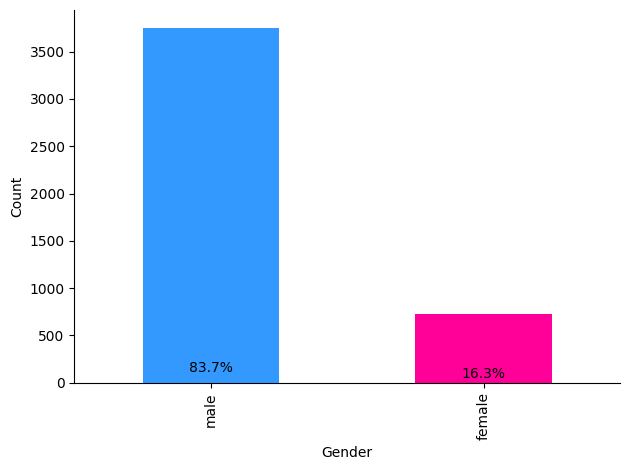

In [196]:
df = nettit_directors

# Calculate the percentage of movies for each gender
gender_counts = df['gender'].value_counts()
gender_percentage = df['gender'].value_counts(normalize=True) * 100

# Plotting
fig, ax = plt.subplots()

# Bar plot
gender_counts.plot(kind='bar', color=['#3399ff', '#ff0099'], ax=ax)

# Add percentage labels on top of the bars
for i, v in enumerate(gender_percentage):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', color='black')

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Adjust ylim to make room for text on top of bars

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

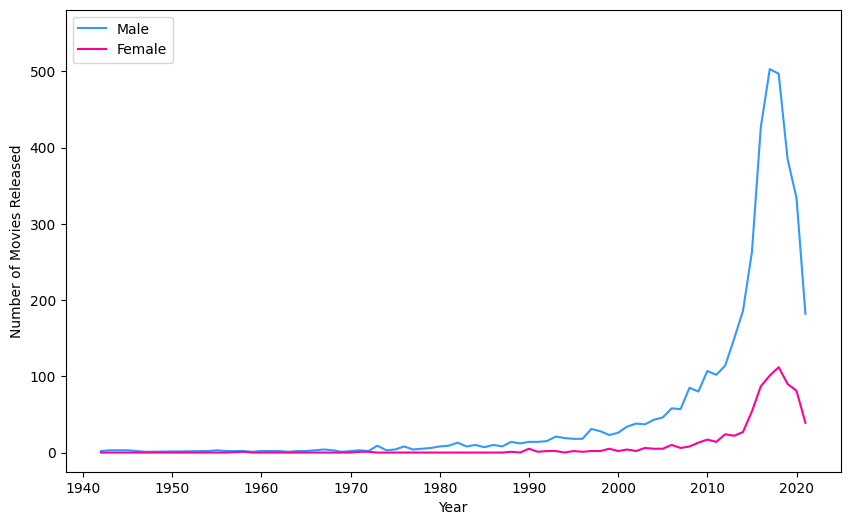

In [115]:
df = nettit_directors.copy()
# Group by release year and gender to get counts
counts = df.groupby(['release_year', 'gender']).size().unstack(fill_value=0)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of movies released by gender
ax1.plot(counts.index, counts['male'], color='#3399ff', label='Male')
ax1.plot(counts.index, counts['female'], color='#ff0099', label='Female')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies Released')
ax1.tick_params(axis='y')

# Adding legend for gender lines
ax1.legend(loc='upper left')

ax1.set_ylim(bottom=None, top=ax1.get_ylim()[1]*1.1)

# Show plot
plt.show()

In [117]:
nettit_directors = nettit_directors[nettit_directors['release_year'] >= 2000]

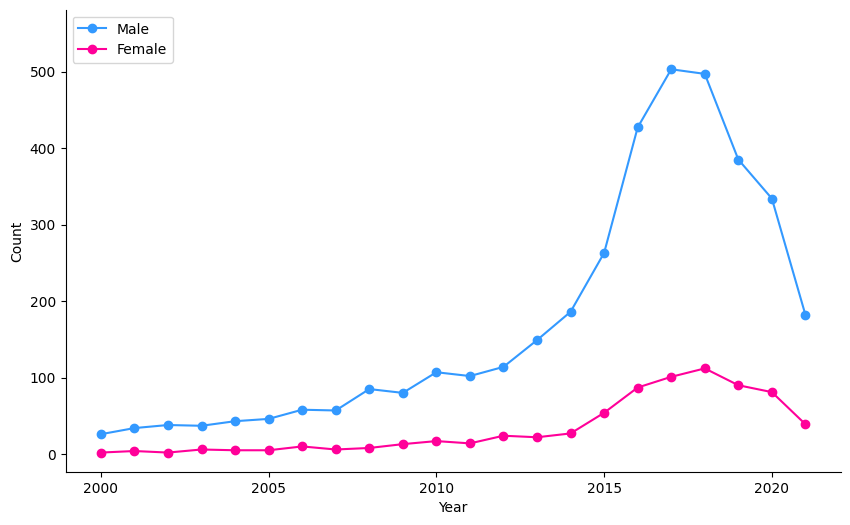

In [165]:
df = nettit_directors.copy()
# Group by release year and gender to get counts
counts = df.groupby(['release_year', 'gender']).size().unstack(fill_value=0)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of movies released by gender
ax1.plot(counts.index, counts['male'], marker='o', color='#3399ff', label='Male')
ax1.plot(counts.index, counts['female'], marker='o', color='#ff0099', label='Female')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Adding legend for gender lines
ax1.legend(loc='upper left')


ax1.set_ylim(bottom=None, top=ax1.get_ylim()[1]*1.1)

# Show plot
plt.show()

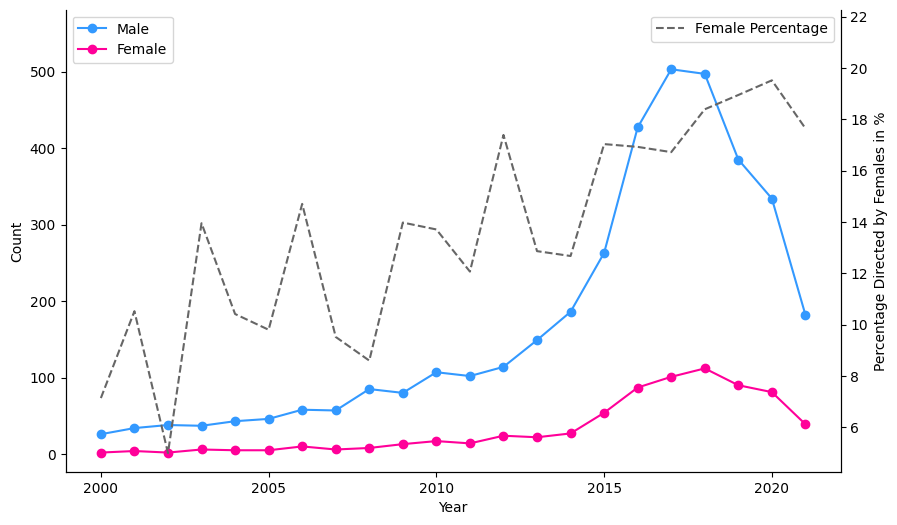

In [171]:
df = nettit_directors.copy()

hfont = {'fontname':'sans'}
# Group by release year and gender to get counts
counts = df.groupby(['release_year', 'gender']).size().unstack(fill_value=0)

# Calculate percentage of movies released by females per year
counts['female_percentage'] = counts['female'] / counts.sum(axis=1) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of movies released by gender
ax1.plot(counts.index, counts['male'], marker='o', color='#3399ff', label='Male')
ax1.plot(counts.index, counts['female'], marker='o', color='#ff0099', label='Female')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y')

# Adding legend for gender lines
ax1.legend(loc='upper left')

# Creating a secondary y-axis for female percentage
ax2 = ax1.twinx()
ax2.plot(counts.index, counts['female_percentage'], linestyle='--', color='#666666', label='Female Percentage')
ax2.set_ylabel('Percentage Directed by Females in %', **hfont)
ax2.tick_params(axis='y')

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Adding legend for female percentage line
ax2.legend(loc='upper right')

ax1.set_ylim(bottom=None, top=ax1.get_ylim()[1]*1.1)
ax2.set_ylim(bottom=None, top=ax2.get_ylim()[1]*1.1)

# Show plot
plt.show()

In [126]:
ages_detailed = {
    'PG-13': 13,
    'TV-MA': 18, 
    'PG': 0, 
    'TV-14' : 14, 
    'TV-PG': 0, 
    'TV-Y': 0, 
    'TV-Y7': 7, 
    'R': 17,
    'TV-G': 0, 
    'G': 0, 
    'NC-17': 18, 
    'NR': 1, 
    'TV-Y7-FV': 7
}

ages = {
    'PG-13': '13/14',
    'TV-MA': '17/18', 
    'PG': '0', 
    'TV-14' : '13/14',
    'TV-PG': '0', 
    'TV-Y': '0', 
    'TV-Y7': '7', 
    'R': '17/18',
    'TV-G': '0', 
    'G': '0', 
    'NC-17': '17/18', 
    'TV-Y7-FV': '7'
}

def get_age(rating):
    if rating in ages.keys():
        return ages[rating]
    else:
        return -1

nettit_directors['min_age'] = nettit_directors['rating'].apply(get_age)
nettit_min_age = nettit_directors[nettit_directors['min_age'] != -1]

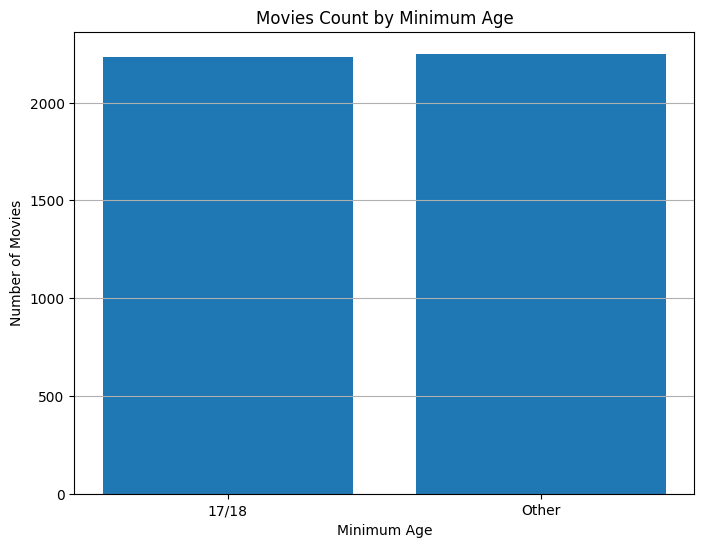

In [127]:

# Count occurrences of '17/18' and other values in the 'min_age' column
min_age_counts = nettit_directors['min_age'].value_counts()

# Extract counts for '17/18' and other values
age_17_18 = min_age_counts.get('17/18', 0)
other_age = min_age_counts.sum() - age_17_18

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['17/18', 'Other'], [age_17_18, other_age])
plt.xlabel('Minimum Age')
plt.ylabel('Number of Movies')
plt.title('Movies Count by Minimum Age')
plt.grid(axis='y')
plt.show()

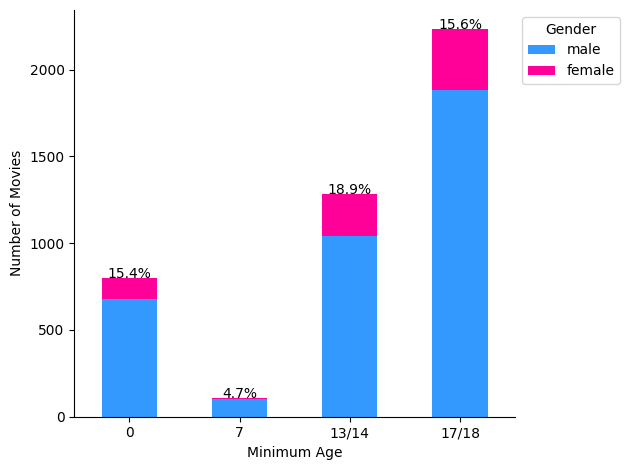

In [208]:
df = nettit_directors
df = df[df['min_age'] != -1]

grouped = df.groupby(['min_age', 'gender']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots()

# Reversing the order of columns to make male on the bottom and female on top
grouped = grouped.iloc[:, ::-1]
order = ['0', '7', '13/14', '17/18']
grouped = grouped.reindex(order)

# Stacked bar plot
grouped.plot(kind='bar', stacked=True, color=['#3399ff', '#ff0099'], ax=ax)

# Calculate and add percentage labels
totals = grouped.sum(axis=1)
for i, v in enumerate(totals):
    ax.text(i, v + 1, f"{(grouped.loc[grouped.index[i], 'female'] / v * 100):.1f}%", color='black', ha='center')

# Add legend and labels
ax.legend(title='Gender', bbox_to_anchor=(1, 1))
ax.set_xlabel('Minimum Age')
ax.set_ylabel('Count')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
from omdbapi.movie_search import GetMovie
movie = GetMovie(api_key='677dd38a')

def get_imdb(title):
    try:
        result = movie.get_movie(title=title)
    except:
        result = -1
    return result

df = nettit_directors.copy()
#df['ombd'] = df['title'].apply(get_imdb)


In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

s = set(stopwords.words('english'))

def filter_words(words):
    return [word.lower() for word in words if word.lower() not in s]

df = nettit_directors
df['words'] = df['description'].str.split(' ')
df['words'] = df['words'].apply(filter_words)
df['words'] = df['words'].apply(stem_words)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age,words
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female,13/14,"[father, near, end, life,, filmmak, kirsten, j..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male,17/18,"[protect, famili, power, drug, lord,, skill, t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male,17/18,"[arriv, charismat, young, priest, bring, glori..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male,0,"[equestria', divided., bright-ey, hero, believ..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,male,13/14,"[talent, batch, amateur, baker, face, 10-week,..."


In [73]:
from collections import Counter

def count_words(group):
    # Combine all words from the 'words' column for the group
    all_words = [word for sublist in group['words'] for word in sublist]
    # Count occurrences of each word
    word_counts = Counter(all_words)
    return word_counts

# Count words for total movies
total_word_counts = count_words(df)

# Filter DataFrame for female directors
female_directors = df[df['gender'] == 'female']
# Count words for female directors
female_word_counts = count_words(female_directors)

# Filter DataFrame for male directors
male_directors = df[df['gender'] == 'male']
# Count words for male directors
male_word_counts = count_words(male_directors)

# Get the top 100 most occurring words for each group
top_100_total_words = total_word_counts.most_common(100)
top_100_female_words = female_word_counts.most_common(100)
top_100_male_words = male_word_counts.most_common(100)

# Display the results
print("Top 100 most occurring words in total:")
print(top_100_total_words)
print("\nTop 100 most occurring words for female directors:")
print(top_100_female_words)
print("\nTop 100 most occurring words for male directors:")
print(top_100_male_words)

# beide Top 100s anzeigen und verhältnisse anzeigen

Top 100 most occurring words in total:
[('young', 373), ('find', 363), ('new', 361), ('take', 307), ('life', 297), ('–', 272), ('famili', 259), ('two', 253), ('man', 248), ('documentari', 228), ('woman', 222), ('get', 219), ('friend', 217), ('live', 204), ('must', 204), ('becom', 196), ('love', 187), ('tri', 182), ('help', 169), ('one', 159), ('—', 158), ('world', 158), ('make', 155), ('save', 149), ('turn', 145), ('teen', 143), ('set', 141), ('forc', 140), ('follow', 135), ('girl', 130), ('three', 129), ('stori', 129), ('fall', 129), ('meet', 125), ('group', 124), ('team', 122), ('face', 116), ('struggl', 116), ('year', 116), ('begin', 113), ('mysteri', 112), ('return', 111), ('home', 110), ('learn', 110), ('back', 108), ('fight', 107), ('discov', 107), ('school', 107), ('stand-up', 107), ('film', 106), ('high', 105), ('come', 103), ('explor', 99), ('work', 96), ('secret', 93), ('move', 91), ("he'", 89), ('star', 89), ('search', 88), ('true', 88), ('student', 88), ('father', 87), ('co

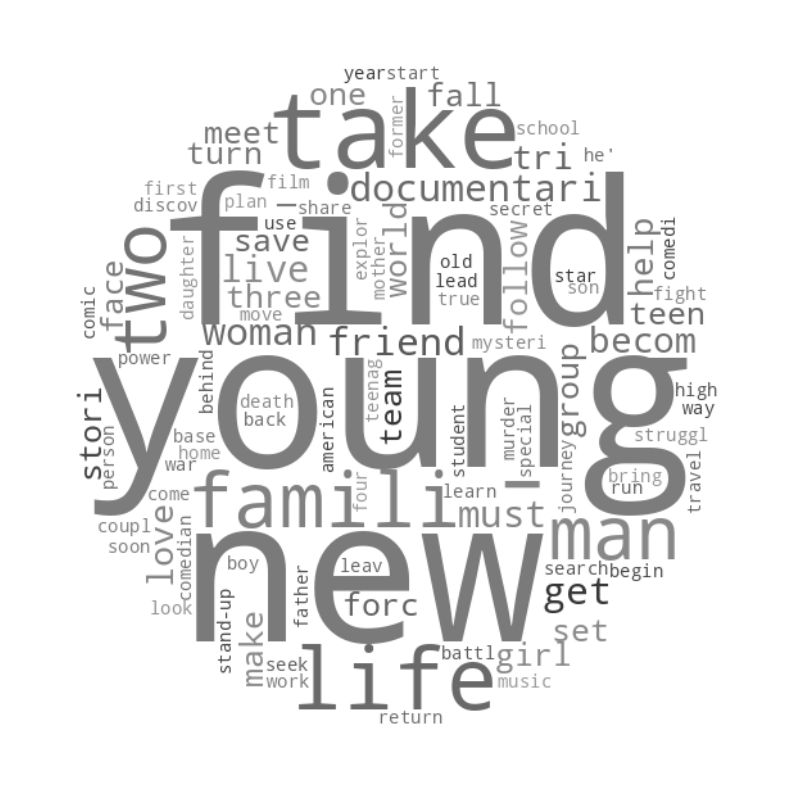

In [98]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['#333333', '#999999', '#666666']  # Pink shades
cmap = LinearSegmentedColormap.from_list("custom_pink", colors, N=256)

words_total_dict = {word: count for word, count in top_100_total_words}

x, y = np.ogrid[:600, :600]  # Change the size of the image grid

mask = (x - 300) ** 2 + (y - 300) ** 2 > 260 ** 2  # Adjust mask size accordingly
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", mask=mask, colormap=cmap).generate_from_frequencies(words_total_dict)

plt.figure(figsize=(10, 10))  # Set the size of the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Get the words and counts that are in the top 100 for female directors but not in the top 100 for male directors
words_counts_only_in_female_directors = [(word, count) for word, count in top_100_female_words if word not in dict(top_100_male_words)]

# Get the words and counts that are in the top 100 for male directors but not in the top 100 for female directors
words_counts_only_in_male_directors = [(word, count) for word, count in top_100_male_words if word not in dict(top_100_female_words)]

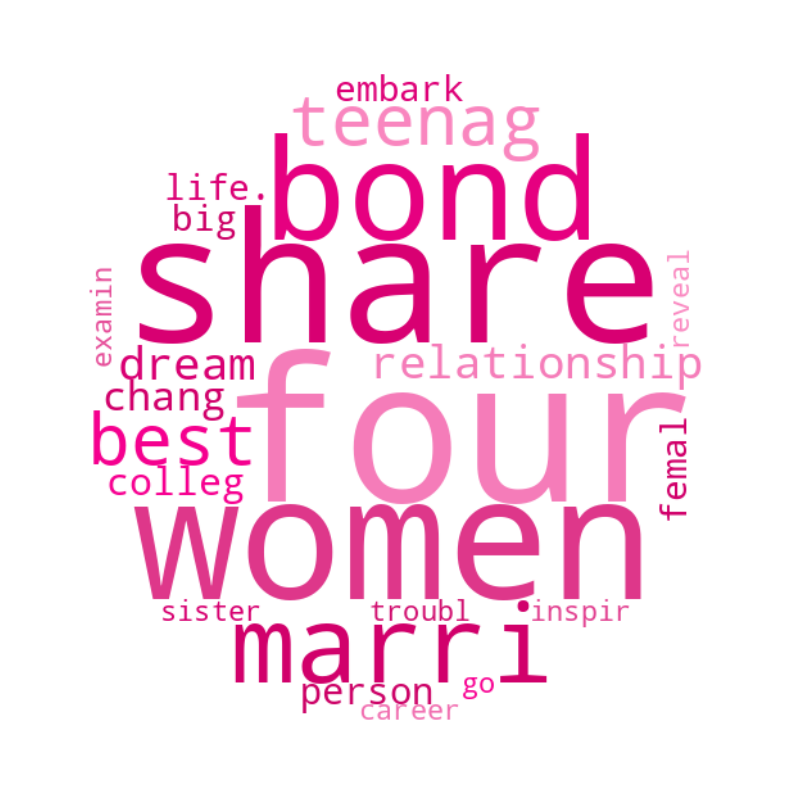

In [102]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['#ff0099', '#cc0066', '#ff99cc']  # Pink shades
cmap = LinearSegmentedColormap.from_list("custom_pink", colors, N=256)

words_total_dict = {word: count for word, count in words_counts_only_in_female_directors}

x, y = np.ogrid[:600, :600]  # Change the size of the image grid

mask = (x - 300) ** 2 + (y - 300) ** 2 > 260 ** 2  # Adjust mask size accordingly
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", mask=mask, colormap=cmap).generate_from_frequencies(words_total_dict)

plt.figure(figsize=(10, 10))  # Set the size of the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

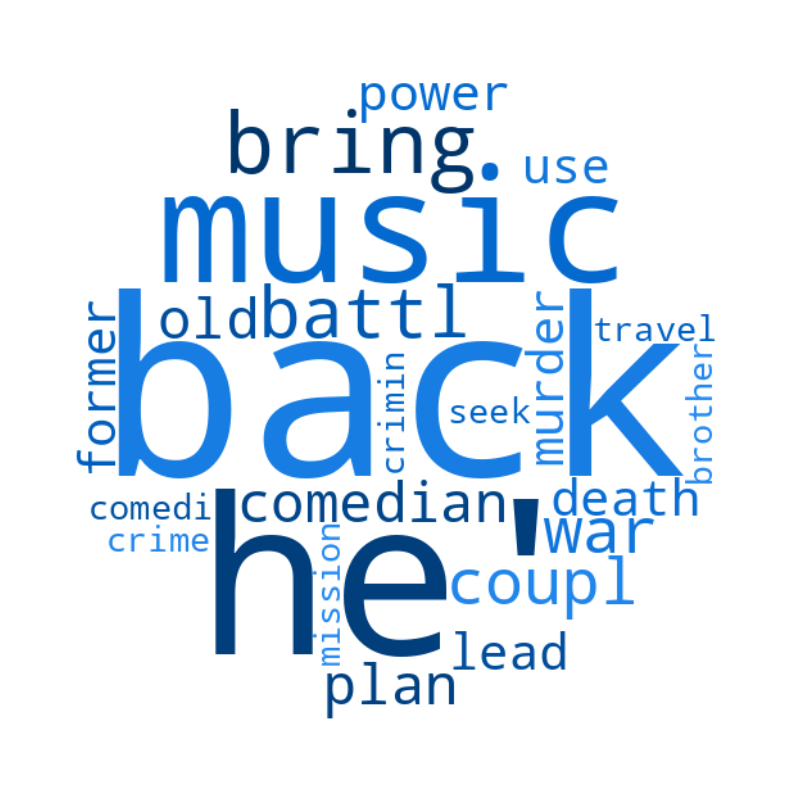

In [101]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['#3399ff', '#0066cc', '#003366']  # Pink shades
cmap = LinearSegmentedColormap.from_list("custom_pink", colors, N=256)

words_total_dict = {word: count for word, count in words_counts_only_in_male_directors}

x, y = np.ogrid[:600, :600]  # Change the size of the image grid

mask = (x - 300) ** 2 + (y - 300) ** 2 > 260 ** 2  # Adjust mask size accordingly
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white", mask=mask, colormap=cmap).generate_from_frequencies(words_total_dict)

plt.figure(figsize=(10, 10))  # Set the size of the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Get the words and counts that are in the top 100 for female directors but not in the top 100 for male directors
words_counts_only_in_female_directors = [(word, count) for word, count in top_100_female_words if word not in dict(top_100_male_words)]

# Get the words and counts that are in the top 100 for male directors but not in the top 100 for female directors
words_counts_only_in_male_directors = [(word, count) for word, count in top_100_male_words if word not in dict(top_100_female_words)]

# Display the results
print("Words and counts that are in the top 100 for female directors but not in the top 100 for male directors:")
for word, count in words_counts_only_in_female_directors:
    print(f"{word}: {count}")



Words and counts that are in the top 100 for female directors but not in the top 100 for male directors:
four: 24
share: 20
women: 20
bond: 18
marri: 17
teenag: 17
best: 17
relationship: 16
dream: 16
chang: 16
colleg: 16
person: 15
embark: 14
life.: 14
big: 14
femal: 14
inspir: 13
reveal: 13
troubl: 13
sister: 13
go: 13
career: 13
examin: 13


In [40]:
omdb_backup = df

In [ ]:
print("\nWords and counts that are in the top 100 for male directors but not in the top 100 for female directors:")
for word, count in words_counts_only_in_male_directors:
    print(f"{word}: {count}")


Words and counts that are in the top 100 for male directors but not in the top 100 for female directors:
back: 100
he': 78
music: 75
bring: 74
battl: 74
coupl: 74
war: 74
comedian: 74
plan: 73
old: 73
power: 72
murder: 70
former: 69
death: 68
lead: 67
use: 62
comedi: 62
travel: 61
seek: 61
brother: 61
crimin: 59
mission: 59
crime: 59


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age,words
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female,13/14,"[father, near, end, life,, filmmak, kirsten, j..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male,17/18,"[protect, famili, power, drug, lord,, skill, t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male,17/18,"[arriv, charismat, young, priest, bring, glori..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male,0,"[equestria', divided., bright-ey, hero, believ..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,male,13/14,"[talent, batch, amateur, baker, face, 10-week,..."


In [ ]:
df = nettit_directors.copy()
df['year_added'] = df['date_added'].str.split().str[-1]
df = df[df['gender']!='unknown']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age,words,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female,13/14,"[father, near, end, life,, filmmak, kirsten, j...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male,17/18,"[protect, famili, power, drug, lord,, skill, t...",2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male,17/18,"[arriv, charismat, young, priest, bring, glori...",2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male,0,"[equestria', divided., bright-ey, hero, believ...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,male,13/14,"[talent, batch, amateur, baker, face, 10-week,...",2021


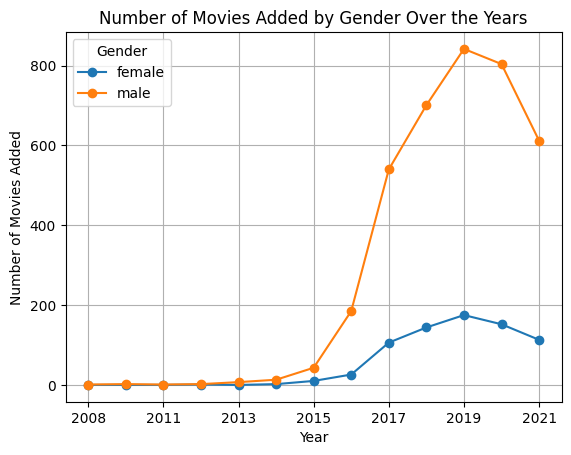

In [ ]:
# Group by 'year_added' and 'gender', then count the occurrences
grouped = df.groupby(['year_added', 'gender']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies Added')
plt.title('Number of Movies Added by Gender Over the Years')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

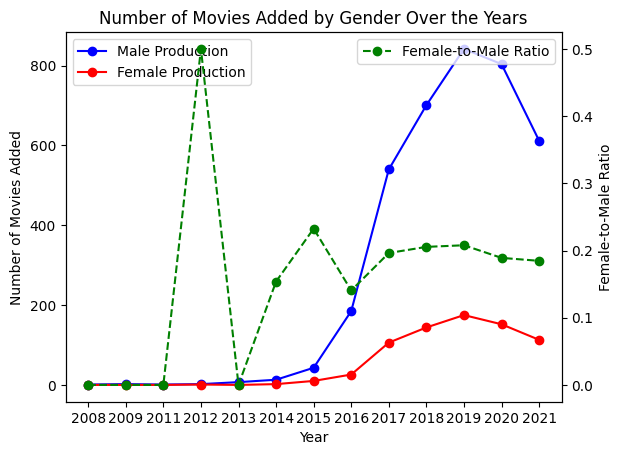

In [ ]:
# Group by 'year_added' and 'gender', then count the occurrences
grouped = df.groupby(['year_added', 'gender']).size().unstack(fill_value=0)

# Calculate the ratio of female to male production
grouped['Female_to_Male_Ratio'] = grouped['female'] / grouped['male']

# Plotting
fig, ax1 = plt.subplots()

# Plot lines for male and female production
ax1.plot(grouped.index, grouped['male'], color='blue', marker='o', label='Male Production')
ax1.plot(grouped.index, grouped['female'], color='red', marker='o', label='Female Production')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies Added')
ax1.set_title('Number of Movies Added by Gender Over the Years')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the ratio
ax2 = ax1.twinx()
ax2.plot(grouped.index, grouped['Female_to_Male_Ratio'], color='green', linestyle='--', marker='o', label='Female-to-Male Ratio')
ax2.set_ylabel('Female-to-Male Ratio')
ax2.legend(loc='upper right')



plt.show()

In [ ]:
len(df[df['year_added'] == '2021'])

725